In [109]:
# libraries
# ----------
# ======

# essential libraries
import os
import math
import random
import datetime

# storing and analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import pandas.plotting as pp

# statistics
from statsmodels.tsa.api import Holt


In [146]:
## load data
df = pd.read_csv("covid_19.csv")

In [136]:
## Exploration

In [137]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [138]:
## dimension
df.shape

(19836, 8)

In [58]:
## Null data
df.isnull().sum()

Province/State    13756
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [59]:
## What happened with Province Variable?
df['Province/State'].unique() # Hubei 

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [60]:
## I am going to work with Country/Region only

df = df.groupby(['Date','Country/Region'])['Confirmed'].sum().reset_index()
## rename the columns, 
df.columns = ['Date', 'Region','Confirmed']


In [61]:
## Put the correct format
df['Date']= pd.to_datetime(df['Date'])
df['Confirmed'] = pd.to_numeric(df['Confirmed'])
## ascending
df.sort_values(by=['Region','Date'], inplace=True, ascending=True)

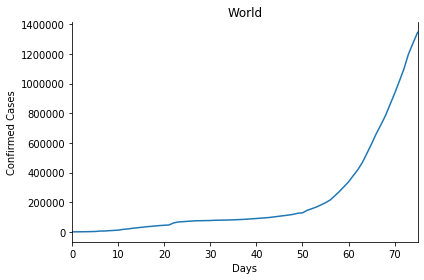

In [62]:
## how look world confirmed cases?
df_world = df.groupby(['Date'])['Confirmed'].sum().reset_index()
ax=df_world['Confirmed'].plot()
ax.set_title("World")
ax.set_xlabel("Days")
ax.set_ylabel("Confirmed Cases")
ax.spines["top"].set_alpha(0)
plt.tight_layout() 

In [71]:
## How look some countries confirmed cases at the same day of the pandemic?

## I am going to put the country data in columns to compare the same numeric days in the pandemic

## some countries
countries = ['China','Italy','US',
             'France','Spain','Brazil']

## only days with confirmed cases by country
df = df[df.Confirmed !=0]

## Put data in columns by country
dfObj = pd.DataFrame(columns=['index','Region','Confirmed'])

for i in df.Region.unique():
    df_2 = df[df['Region']==i]
    df_2.reset_index(inplace = True, drop = True)
    df_2.reset_index(inplace =True) 
    df_2 = df_2[['index','Region','Confirmed']]
    dfObj= dfObj.append(df_2)

dfObj['Confirmed'] = pd.to_numeric(dfObj['Confirmed'])
dfObj = dfObj.pivot(index='index',columns='Region',values='Confirmed')


In [72]:
dfObj.head()

Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,...,4.0,2.0,4.0,1.0,2.0,2.0,4.0,4.0,2.0,1.0
1,1.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,2.0,...,4.0,2.0,4.0,6.0,10.0,2.0,7.0,4.0,2.0,3.0
2,1.0,12.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,3.0,...,4.0,2.0,8.0,10.0,17.0,2.0,16.0,NaN,2.0,3.0
3,1.0,23.0,1.0,1.0,3.0,1.0,2.0,1.0,6.0,3.0,...,4.0,2.0,29.0,15.0,33.0,2.0,16.0,NaN,2.0,3.0
4,1.0,33.0,1.0,1.0,3.0,1.0,8.0,1.0,9.0,9.0,...,5.0,2.0,50.0,23.0,36.0,2.0,19.0,NaN,3.0,3.0


In [73]:
## subset
df_countries = dfObj[countries]

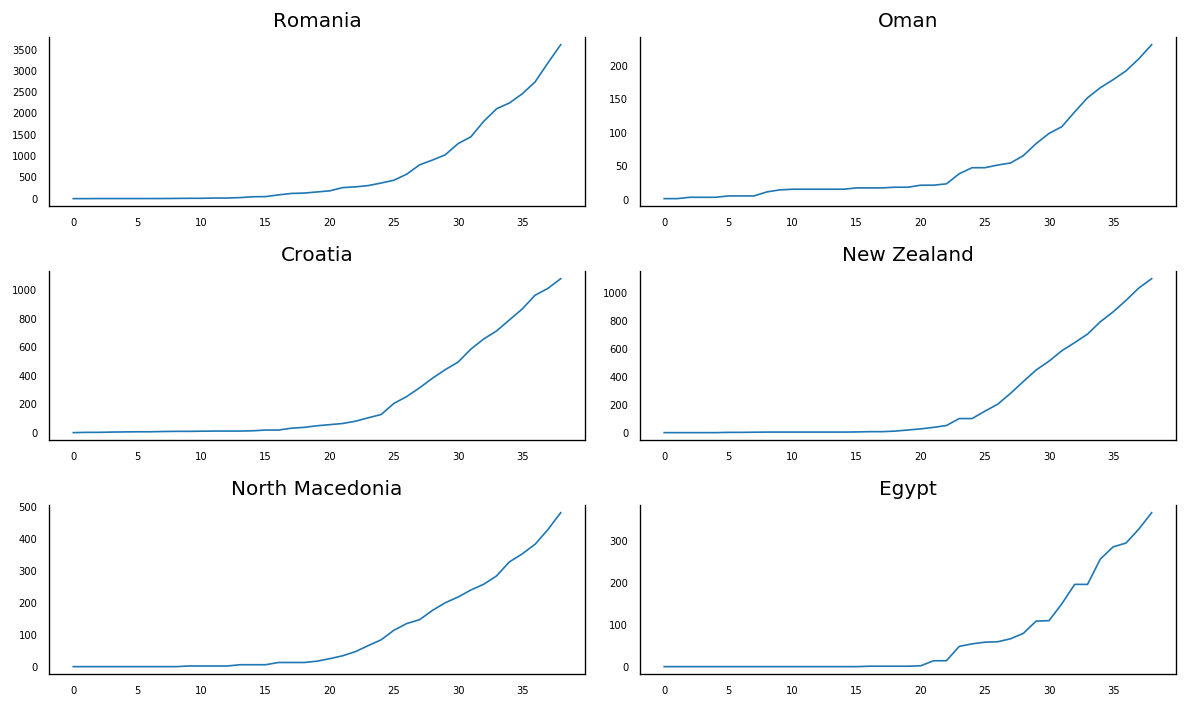

In [106]:


pp.register_matplotlib_converters()
# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_countries[df_countries.columns[i]]
    ax.plot(data, linewidth=1) #color='blue'
    # Decorations
    ax.set_title(df_countries.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout();

## Mexico

In [144]:
df[df["Region"]=="Mexico"].tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
18689,NaN,Mexico,23.6345,-102.5528,4/2/20,1378,37,35
18950,NaN,Mexico,23.6345,-102.5528,4/3/20,1510,50,633
19211,NaN,Mexico,23.6345,-102.5528,4/4/20,1688,60,633
19472,NaN,Mexico,23.6345,-102.5528,4/5/20,1890,79,633
19733,NaN,Mexico,23.6345,-102.5528,4/6/20,2143,94,633


In [76]:
## Subset Mexico, to know in what day of the pandemic is
df_mx = dfObj['Mexico']
df_mx = df_mx.dropna()
df_mx.index.max()


38

In [77]:
## Same period
df1 = dfObj[dfObj.index<=df_mx.index.max()]

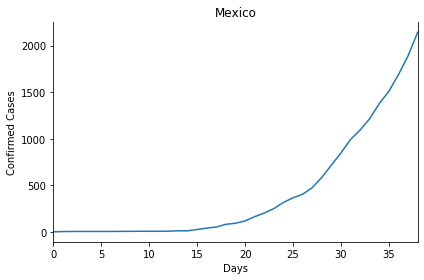

In [78]:
## Mexico
ax=df_mx.plot()
ax.set_title("Mexico")
ax.set_xlabel("Days")
ax.set_ylabel("Confirmed Cases")
ax.spines["top"].set_alpha(0)
plt.tight_layout() 

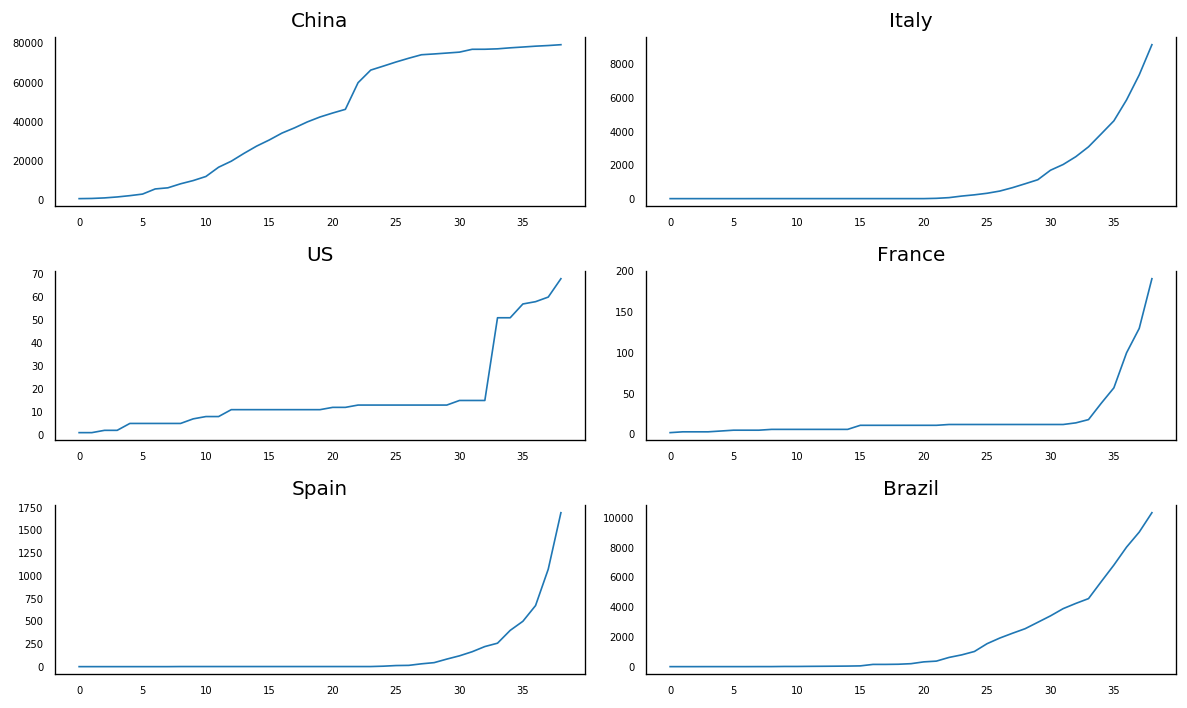

In [79]:
## subset
df_countries = df1[countries]
register_matplotlib_converters()

# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_countries[df_countries.columns[i]]
    ax.plot(data, linewidth=1) #color='blue'
    # Decorations
    ax.set_title(df_countries.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout();

In [80]:
## What countries are correlated with Mexico?

## 1. Preparation
no_nulls= set(df1.columns[df1.isnull().sum()==0])
df1 = df1[no_nulls]
## not variation
yes_var = set(df1.columns[df1.var()!=0])
df1 = df1[yes_var]
df1_corr = df1.corr(method ='pearson') 

In [86]:
#reset columns and index names 
df1_corr = df1_corr.rename_axis(None).rename_axis(None, axis=1)
df1_corr = df1_corr.stack().reset_index()
#set column names
df1_corr.columns = ['Region1','Region2','Correlation']

In [88]:
df1_corr = df1_corr[df1_corr['Region1']=='Mexico']
df1_corr =df1_corr[df1_corr['Correlation']>0.85]

In [90]:
## sort
df1_corr.sort_values(by=['Correlation'], inplace=True, ascending=False)

In [94]:
df1_corr.head(6)

,Region1,Region2,Correlation
770,Mexico,Mexico,1.000000
786,Mexico,Romania,0.997952
775,Mexico,Oman,0.996541
782,Mexico,Croatia,0.995925
784,Mexico,New Zealand,0.995750
795,Mexico,North Macedonia,0.995419


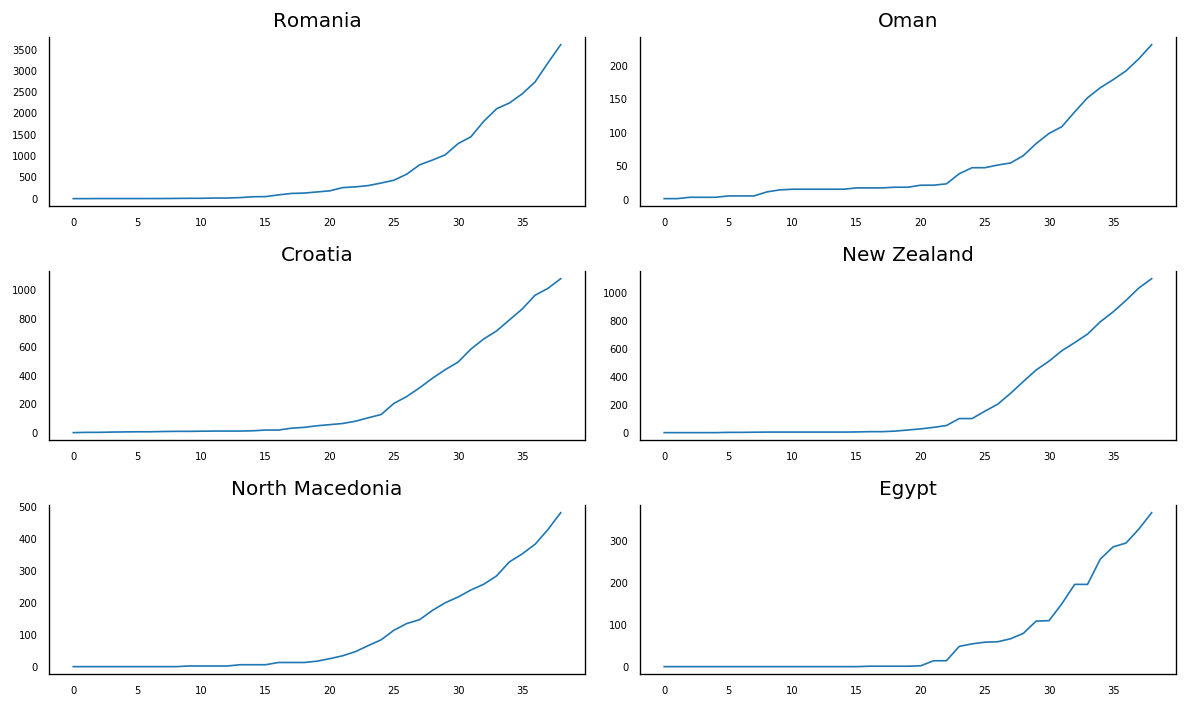

In [95]:
## subset
## some countries
countries = ['Romania','Oman','Croatia',
             'New Zealand','North Macedonia','Egypt']
df_countries = df1[countries]
register_matplotlib_converters()

# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_countries[df_countries.columns[i]]
    ax.plot(data, linewidth=1) #color='blue'
    # Decorations
    ax.set_title(df_countries.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout();

## 1.  Exponential smoothing

In [ ]:
## quick check

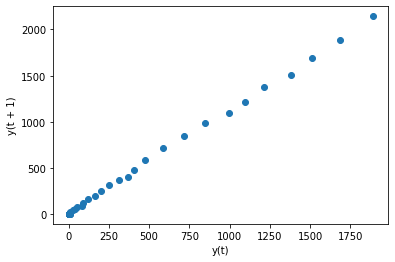

In [111]:
## First Approach univariated data with Exponential smoothing

## relation
pp.lag_plot(df_mx)
pyplot.show()

In [101]:
## Correlation periods 
values = pd.DataFrame(df_mx.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.999495
t+1  0.999495  1.000000


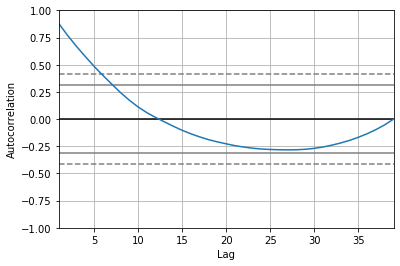

In [112]:
## autocorrelation plot
series = df_mx
pp.autocorrelation_plot(series)
pyplot.show()

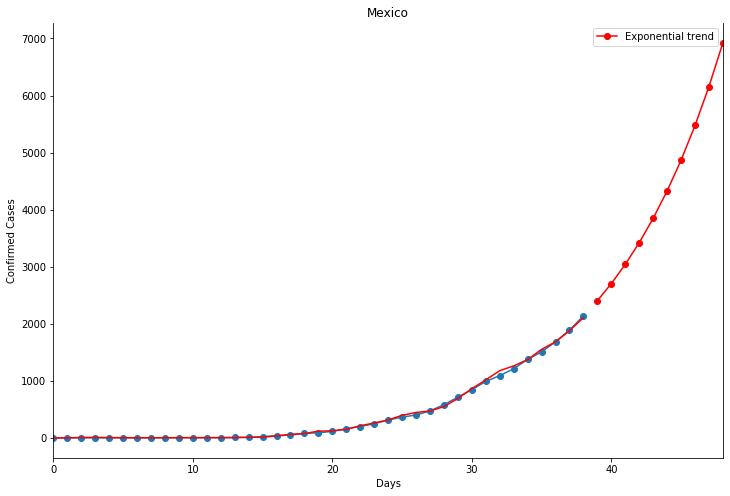

In [133]:
## make modeel

data = pd.Series(df_mx)
data = data.astype('double')

fit = Holt(data, exponential=True).fit(
    smoothing_level=0.9, # alpha
    smoothing_slope=0.5,  # beta
    optimized=False)

fcast = fit.forecast(10).rename("Exponential trend")

ax = data.plot( marker="o", figsize=(12,8)) # color="blue",
fit.fittedvalues.plot(ax=ax, color='red')
fcast.plot(ax=ax, color='red', marker="o", legend=True)
ax.set_title("Mexico")
ax.set_xlabel("Days")
ax.set_ylabel("Confirmed Cases")
ax.spines["top"].set_alpha(0)
plt.show()
# print("Fg: Cases in Mexico Forecast.")

In [129]:
## foreecast
fit2.forecast(10)

39    2406.331326
40    2706.269803
41    3043.594276
42    3422.964740
43    3849.622043
44    4329.460277
45    4869.108209
46    5476.020851
47    6158.582450
48    6926.222310
dtype: float64